### Business Overview/Problem
PharmaCorp faces a significant business challenge related to the optimization of its pharmaceutical supply chain inventory. The primary issues include:

A. Overproduction and Losses: PharmaCorp often produces medications in quantities that exceed market demand. This overproduction leads to substantial financial losses due to expired shelf-life and the need for disposal of unsold products.

B. Shelf Life Management: Managing the varying shelf lives of different pharmaceutical products is a complex task. Failure to sell products before their expiration date not only results in financial losses but also poses potential risks to patient safety.

C. Market Trends: The pharmaceutical industry is highly dynamic, with market trends and demand patterns constantly evolving. PharmaCorp struggles to align its production schedules with these ever-changing market dynamics.


D. Competitive Pressures: PharmaCorp faces intense competition from other pharmaceutical companies. Efficient inventory management is crucial to maintaining a competitive edge and optimizing costs.

### Rationale for the Project

Supply Chain Inventory Optimization is the process of managing inventory levels in a supply chain to minimize costs while meeting customer demand. It is crucial in the pharmaceutical industry because of the perishable nature of drugs and the need to maintain a high level of quality control. The significance of initiating this project lies in several compelling reasons:

 
A. Cost Reduction: PharmaCorp incurs significant financial losses due to overproduction and inventory mismanagement. Optimizing inventory based on shelf life and market trends can lead to substantial cost reductions.
 
B. Enhanced Profitability: Reducing losses from overproduction and minimizing waste will directly impact PharmaCorp's profitability, allowing resources to be allocated more efficiently.
 
C. Competitive Advantage: Efficient inventory management will provide PharmaCorp with a competitive advantage by allowing the company to respond more effectively to market trends and customer demands.
 
D. Sustainability: Reducing overproduction and waste aligns with PharmaCorp's commitment to sustainability and responsible business practices.

### Aim of the Project
The project aims to achieve the following objectives:

 
A. Reduce Overproduction: Implement an inventory optimization strategy that significantly reduces overproduction of pharmaceutical products.
 
B. Minimize Losses: Minimize financial losses associated with expired products by aligning inventory with shelf life.
 
C. Improve Forecasting: Enhance demand forecasting accuracy by incorporating market trends and historical sales data.

### Data Description
The dataset available from the company contains the following information:

 

✓ Product ID: Product unique identifier, for each product.

✓ Shelf Life Days: Shelf life of the pharmaceutical product in days.

✓ Sales 2021: Total number of sales of that product in 2021.

✓ Sales 2022: Total number of sales of that product in 2022.

✓ Market Trend Factor: An index that measures factors like market trends, consumer preferences, competitor actions, and other external factors.

✓ Compliance Status: This is an indication of whether or not a drug is compliant with regulation. Can be either of two things ‘Compliant’ or ‘Non-compliant’.

### Tech Stack
Python Programming language will be used alongside the libraries below:
 
A. Pandas
B. Matplotlib
C. Seaborn
D. Sklearn

### Project Scope
A. Data Collection: Gather product information, sales, market data and compliance data

 

B. Data Processing: Clean and preprocess data, handling missing values and outliers

 

C. Exploratory Data Analysis: Explore the data to identify patterns

 

D. Model Evaluation: Assess model performance using multiple metrics

 

E. Model Building: Develop an ML model to forecast sales

 

F. Feature Engineering: Create relevant features for modeling, 

 

G. Inventory Optimization: Determine optimal inventory levels needed

### 1. Data Exploration and Preprocessing

In [1]:
#import necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [2]:
#read dataset into dataframe
df = pd.read_csv("Dataset.csv")
print(f"Data has {df.shape[1]} rows and {df.shape[0]} columns")
df.head()

Data has 11 rows and 19381 columns


,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


In [3]:
#checking for null set or duplicates
print(f"Data has {sum(df.isnull().sum())} null set present")
print(f"Data has {df.duplicated().sum()} duplicates present")
df.describe(include = "all")


Data has 0 null set present
Data has 0 duplicates present


,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
count,19381,19381.000000,19381.000000,19381.000000,19381.000000,19381,19381,19381,19381,19381.000000,19381
unique,19381,NaN,NaN,NaN,NaN,2,10,3,3,NaN,3
top,Product_1,NaN,NaN,NaN,NaN,Compliant,Supplier_10,Location_B,Category_B,NaN,Warehouse_A
freq,1,NaN,NaN,NaN,NaN,9742,1984,6506,6601,NaN,6534
mean,NaN,301.737939,618.423250,618.798256,0.999851,NaN,NaN,NaN,NaN,21.327073,NaN
std,NaN,25.576353,239.313199,220.590729,0.257548,NaN,NaN,NaN,NaN,7.090764,NaN
min,NaN,260.000000,80.000000,234.000000,0.078110,NaN,NaN,NaN,NaN,6.000000,NaN
25%,NaN,278.000000,429.000000,429.000000,0.823775,NaN,NaN,NaN,NaN,16.000000,NaN
50%,NaN,302.000000,619.200000,621.000000,1.000239,NaN,NaN,NaN,NaN,21.000000,NaN
75%,NaN,326.000000,811.200000,809.000000,1.175179,NaN,NaN,NaN,NaN,27.000000,NaN


In [4]:
df["Manufacturing_Location"]

0        Location_B
1        Location_C
2        Location_C
3        Location_C
4        Location_A
            ...    
19376    Location_C
19377    Location_C
19378    Location_B
19379    Location_A
19380    Location_C
Name: Manufacturing_Location, Length: 19381, dtype: object

In [5]:
Numerical = df.select_dtypes(include = "number")
Categorical = df.select_dtypes(exclude = "number")

### 2. Exploratory Data Analysis
#### 2.1.1. Numerical Data - Univariate Analysis

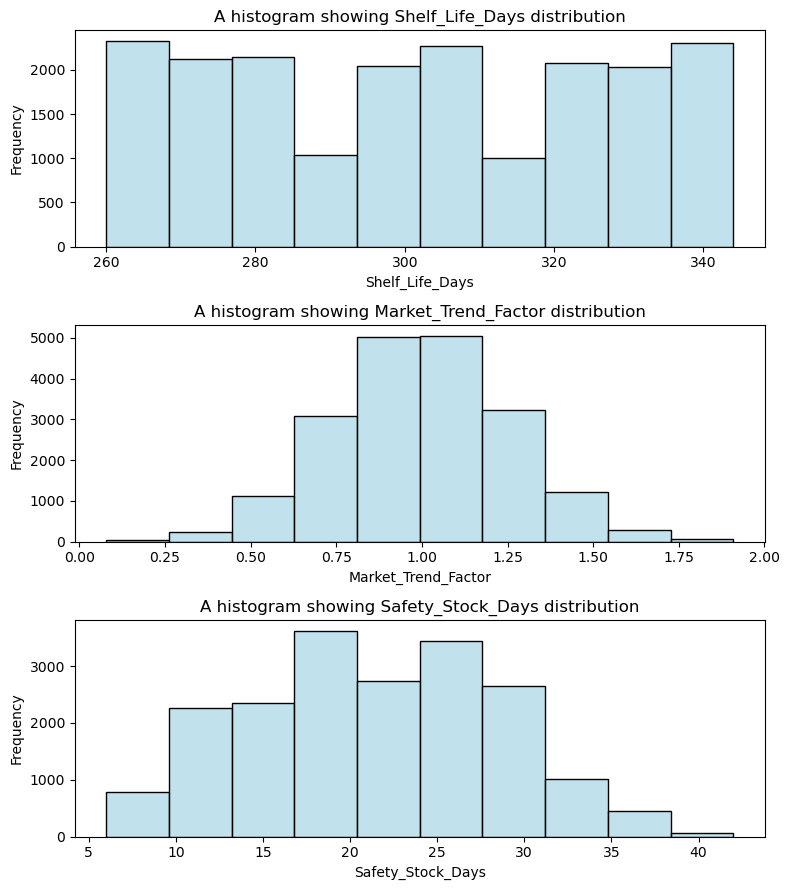

In [6]:
plt.figure(figsize=(8,9))
for i, col in enumerate(['Shelf_Life_Days','Market_Trend_Factor','Safety_Stock_Days']):
    plt.subplot(3, 1, i+1)  # Create subplot for each column
    sns.histplot(Numerical[col], bins=10,color = "lightblue")
    plt.title(f'A histogram showing {col} distribution')
    plt.ylabel('Frequency')
    
plt.tight_layout() 
plt.show()

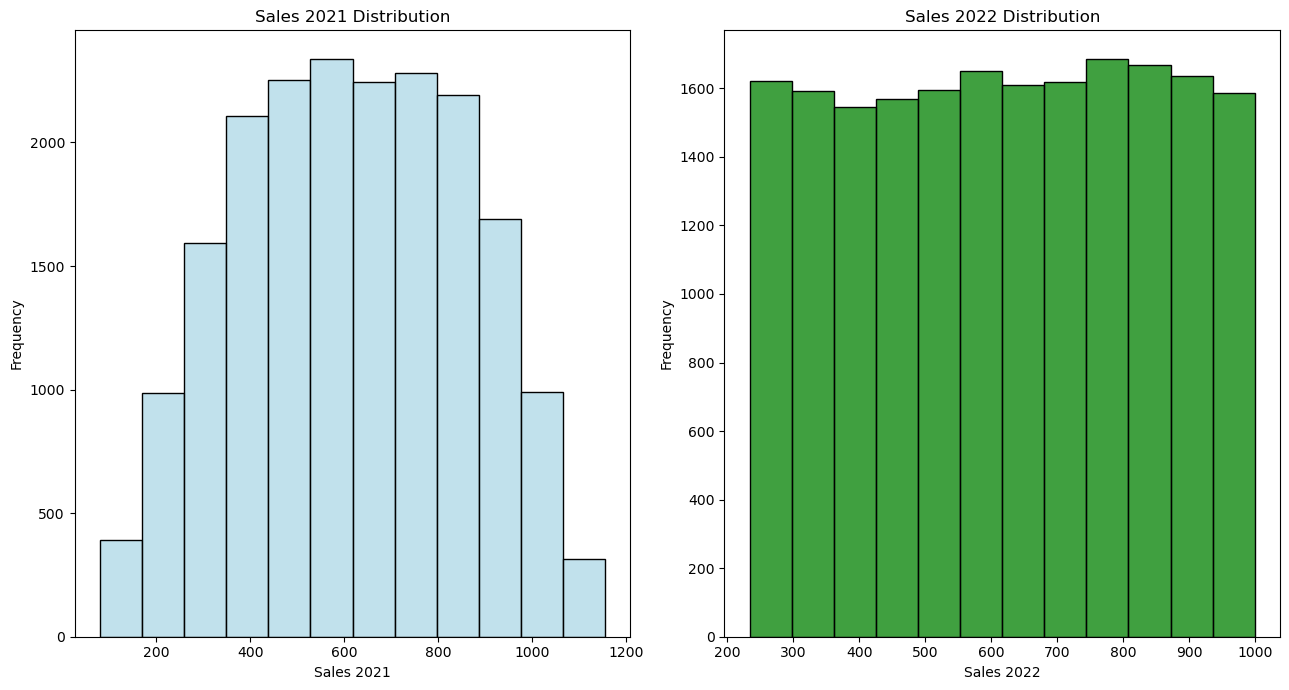

In [7]:
fig, ax = plt.subplots(1,2,figsize = (13,7))
#histogram showing distribution in yearly sales(2021,2022)
sns.histplot(Numerical["Sales_2021"],bins = 12, ax = ax[0],color = "lightblue")
ax[0].set_title("Sales 2021 Distribution")
ax[0].set_xlabel("Sales 2021")
ax[0].set_ylabel("Frequency")

sns.histplot(Numerical["Sales_2022"], bins = 12, ax = ax[1],color = "green")
ax[1].set_title("Sales 2022 Distribution")
ax[1].set_xlabel("Sales 2022")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

* On analysis,all products had a shelf life within a year. This is small given that pharmaceutical products can stay for a long period before it gets dispensed out. 
* More than 80% of Market Trend factors, which is a summation of all the factors shape market trends fell between 0.50 and 1.50 more centered around 1.00
* Sales in 2021 followed a bell shaped curve, so most sales in 2021 were centered around 600, though 2022 had more evenly distributed number of sales, the highest number of sales attained was less than 1000--lower than that of 2021

#### 2.1.2 Categorical Data-Univariate Analysis 

In [8]:
#dropping Product_ID,
Categorical.drop("Product_ID", axis =1, inplace = True)

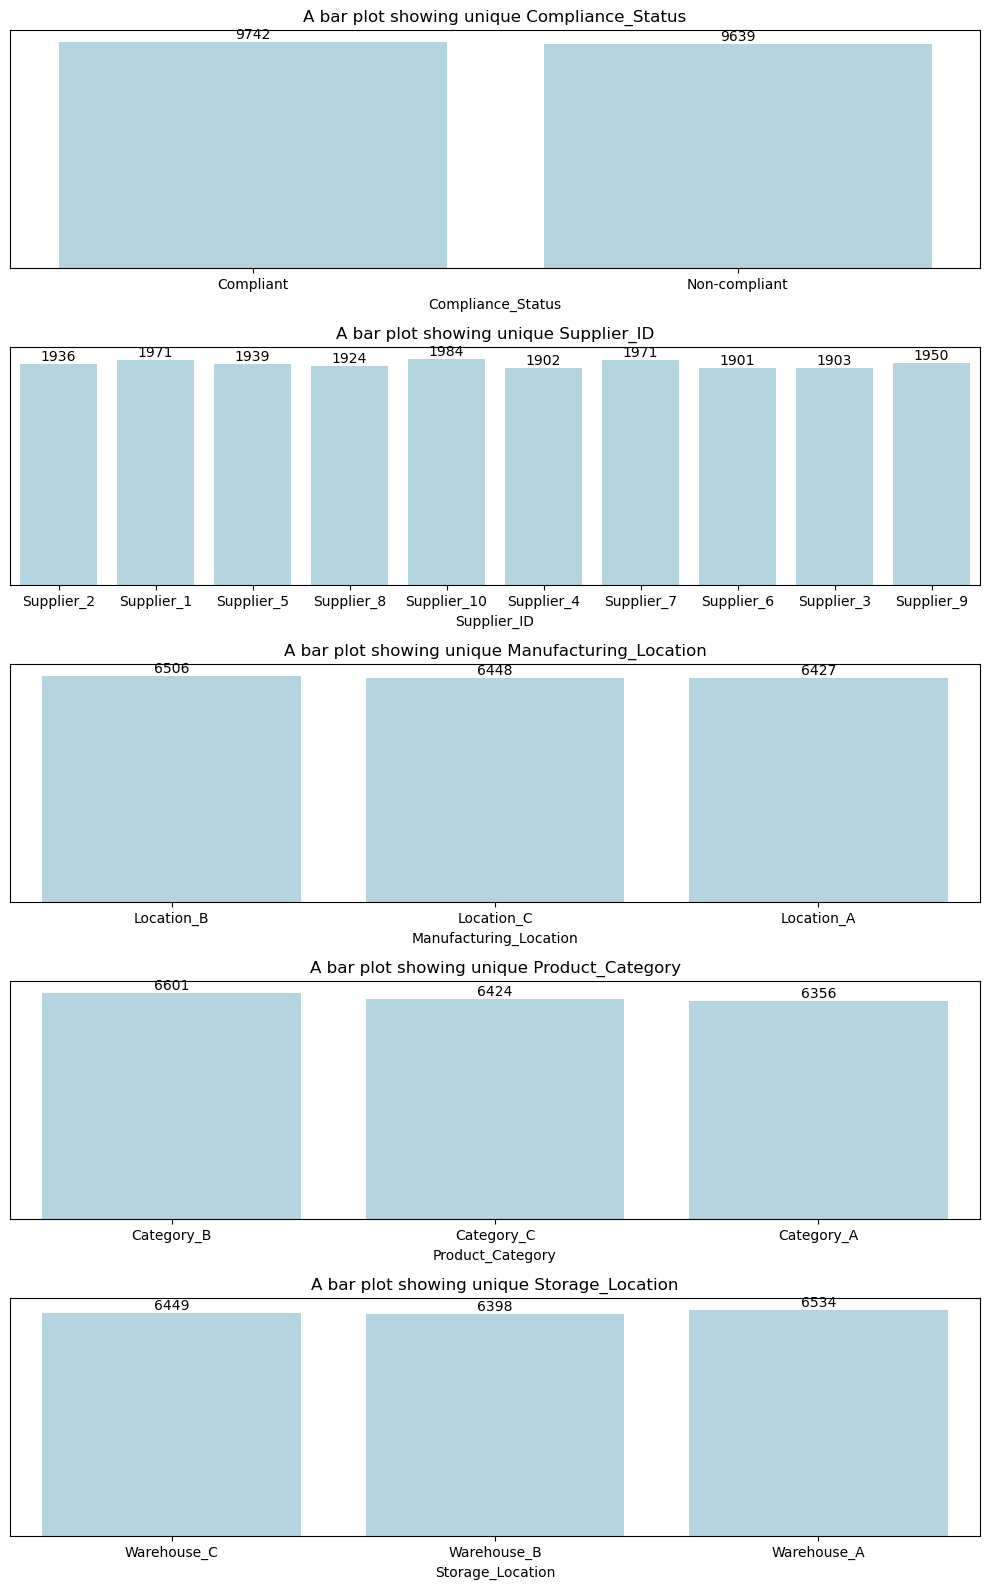

In [9]:
plt.figure(figsize=(10,16))
for i, col in enumerate(Categorical.columns):
    plt.subplot(5, 1, i+1)  # Create subplot for each column
    counts = sns.countplot(x= col, data= Categorical, color = "lightblue") 
    plt.bar_label(counts.containers[0])
    plt.title(f'A bar plot showing unique {col}')
    plt.xlabel(col)
    plt.yticks([])
    plt.ylabel('')
    
plt.tight_layout()
plt.show()
print ()


#### 2.2 Bivariant Analysis

##### 2.2.1  Sales  against Categorical Variables
###### 2..2..1.1 Sales 2021

Text(0, 0.5, 'Sales 2021')

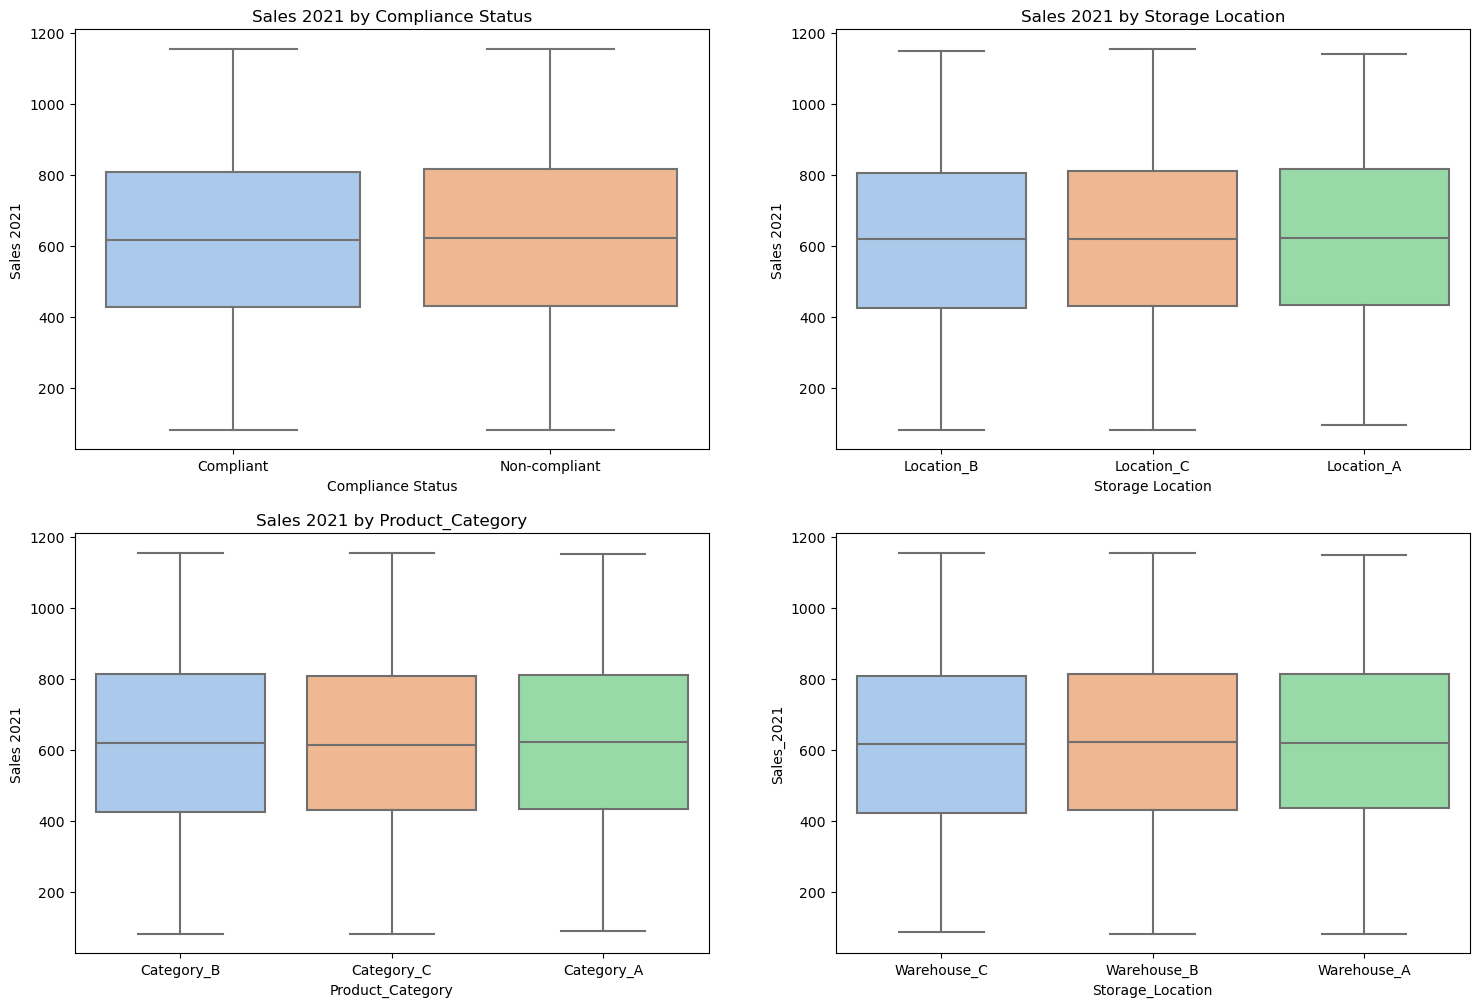

In [10]:
fig, ax = plt.subplots(2,2,figsize = (18,12))
#Against compliance status
sns.boxplot(data = df, x = "Compliance_Status", y = "Sales_2021", ax = ax[0,0], palette = 'pastel')
ax[0,0].set_title("Sales 2021 by Compliance Status")
ax[0,0].set_xlabel("Compliance Status")
ax[0,0].set_ylabel("Sales 2021")

#Against Manufacturing Location
sns.boxplot(data = df, x = "Manufacturing_Location", y = "Sales_2021", ax = ax[0,1], palette = 'pastel')
ax[0,1].set_title("Sales 2021 by Manufacturing Location")
ax[0,1].set_xlabel("Manufacturing Location")
ax[0,1].set_ylabel("Sales 2021")

#Product Category
sns.boxplot(data = df, x = "Product_Category", y = "Sales_2021", ax = ax[1,0], palette = 'pastel')
ax[1,0].set_title("Sales 2021 by Product_Category")
ax[1,0].set_xlabel("Product_Category")
ax[1,0].set_ylabel("Sales 2021")

#Storage Location
sns.boxplot(data = df, x = "Storage_Location", y = "Sales_2021", ax = ax[1,1], palette = 'pastel')
ax[0,1].set_title("Sales 2021 by Storage Location")
ax[0,1].set_xlabel("Storage Location")
ax[0,1].set_ylabel("Sales 2021")

###### 2.2.1.2 Sales 2022




Text(0, 0.5, 'Sales 2022')

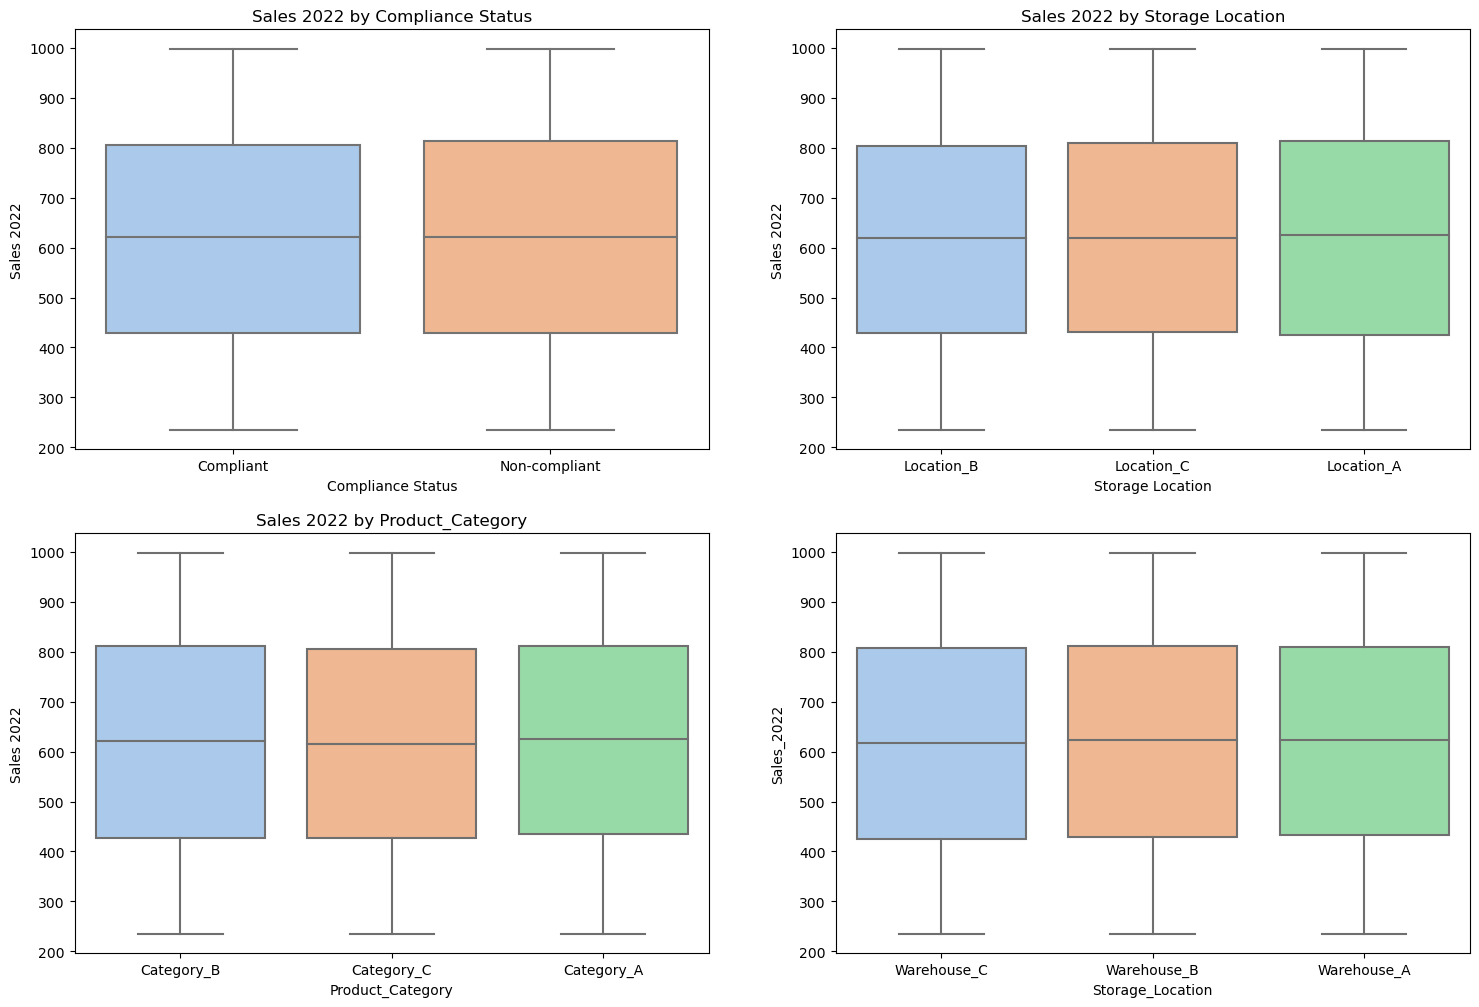

In [11]:
fig, ax = plt.subplots(2,2,figsize = (18,12))
#Against compliance status
sns.boxplot(data = df, x = "Compliance_Status", y = "Sales_2022", ax = ax[0,0], palette = 'pastel')
ax[0,0].set_title("Sales 2022 by Compliance Status")
ax[0,0].set_xlabel("Compliance Status")
ax[0,0].set_ylabel("Sales 2022")

#Against Manufacturing Location
sns.boxplot(data = df, x = "Manufacturing_Location", y = "Sales_2022", ax = ax[0,1], palette = 'pastel')
ax[0,1].set_title("Sales 2022 by Manufacturing Location")
ax[0,1].set_xlabel("Manufacturing Location")
ax[0,1].set_ylabel("Sales 2022")

#Product Category
sns.boxplot(data = df, x = "Product_Category", y = "Sales_2022", ax = ax[1,0], palette = 'pastel')
ax[1,0].set_title("Sales 2022 by Product_Category")
ax[1,0].set_xlabel("Product_Category")
ax[1,0].set_ylabel("Sales 2022")

#Storage Location
sns.boxplot(data = df, x = "Storage_Location", y = "Sales_2022", ax = ax[1,1], palette = 'pastel')
ax[0,1].set_title("Sales 2022 by Storage Location")
ax[0,1].set_xlabel("Storage Location")
ax[0,1].set_ylabel("Sales 2022")

#### 2.2.2 Sales against Numerical Variables
##### 2.2.2.1 Sales 2021 against Shelf Life and Markrt Trend Factor

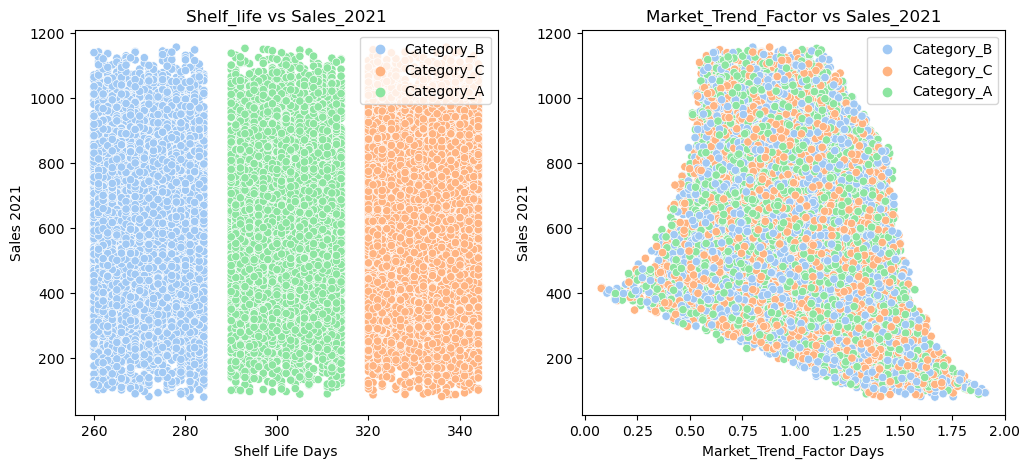

In [12]:
#Against Shelf Life
fig,ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(data = df, x = "Shelf_Life_Days", y = "Sales_2021", ax = ax[0],
                hue = "Product_Category",palette = "pastel")
ax[0].set_title("Shelf_life vs Sales_2021")
ax[0].set_xlabel("Shelf Life Days")
ax[0].set_ylabel("Sales 2021")
ax[0].legend(loc = "upper right")

#Against Market Trends
sns.scatterplot(data = df, x = "Market_Trend_Factor", y = "Sales_2021", ax = ax[1],
                hue = "Product_Category",palette = "pastel")
ax[1].set_title("Market_Trend_Factor vs Sales_2021")
ax[1].set_xlabel("Market_Trend_Factor Days")
ax[1].set_ylabel("Sales 2021")
ax[1].legend(loc = "upper right")


##### 2.2.2.2 Sales 2022 against Shelf Life and Markrt Trend Factor

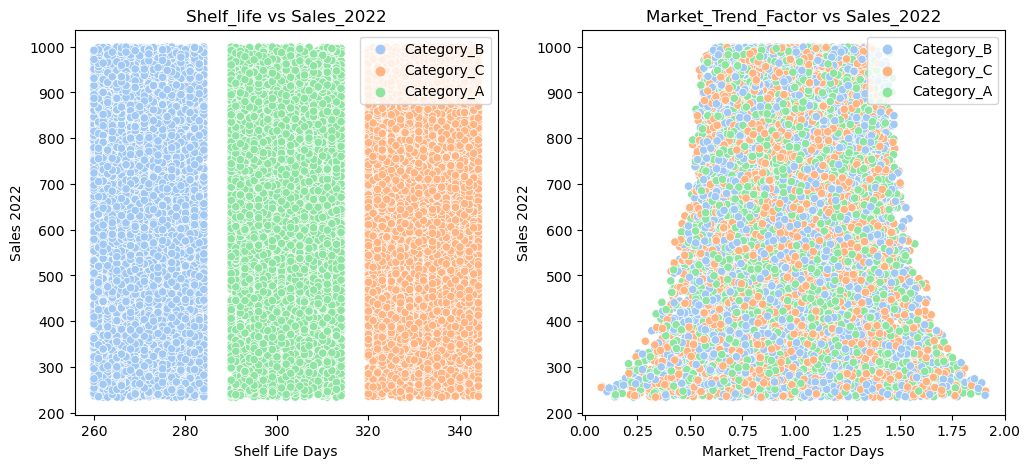

In [13]:
#Against Shelf Life
fig,ax = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(data = df, x = "Shelf_Life_Days", y = "Sales_2022", ax = ax[0],
                hue = "Product_Category",palette = "pastel")
ax[0].set_title("Shelf_life vs Sales_2022")
ax[0].set_xlabel("Shelf Life Days")
ax[0].set_ylabel("Sales 2022")
ax[0].legend(loc = "upper right")

#Against Market Trends
sns.scatterplot(data = df, x = "Market_Trend_Factor", y = "Sales_2022", ax = ax[1],
                hue = "Product_Category",palette = "pastel")
ax[1].set_title("Market_Trend_Factor vs Sales_2022")
ax[1].set_xlabel("Market_Trend_Factor Days")
ax[1].set_ylabel("Sales 2022")
ax[1].legend(loc = "upper right")

##### 2.2.2.3 Sales 2021, 2022 difference and Market Trend Factor


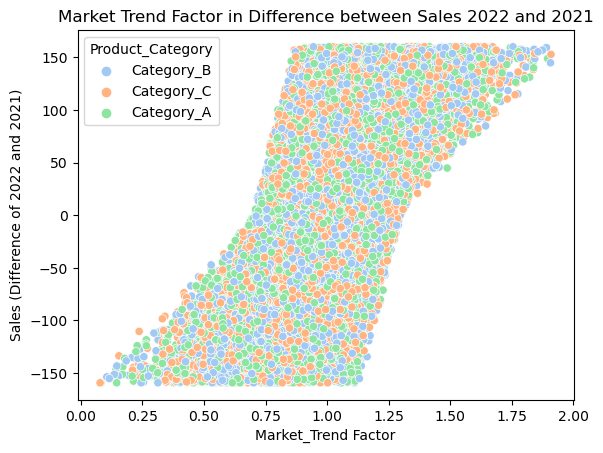

In [14]:
df["Sales_2022-Sales_2021"] = df['Sales_2022']-df['Sales_2021']
sns.scatterplot(data = df, x = "Market_Trend_Factor", y = "Sales_2022-Sales_2021", hue = "Product_Category", palette = "pastel")
plt.title("Market Trend Factor in Difference between Sales 2022 and 2021")
plt.xlabel("Market_Trend Factor")
plt.ylabel("Sales (Difference of 2022 and 2021)")
df.drop("Sales_2022-Sales_2021",axis = 1, inplace = True)

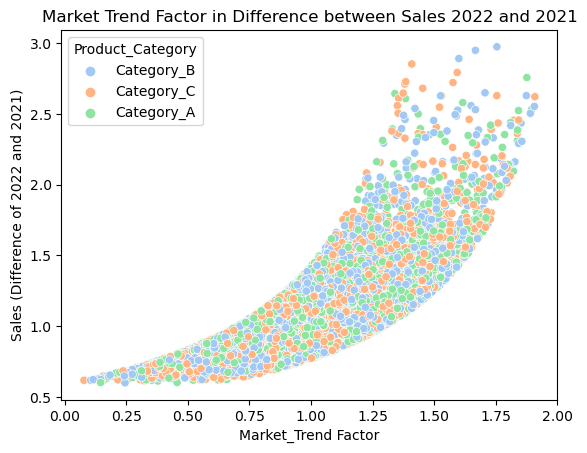

In [15]:
df["Sales_2022/Sales_2021"] = df['Sales_2022']/df['Sales_2021']
sns.scatterplot(data = df, x = "Market_Trend_Factor", y = "Sales_2022/Sales_2021", hue = "Product_Category", palette = "pastel")
plt.title("Market Trend Factor in Difference between Sales 2022 and 2021")
plt.xlabel("Market_Trend Factor")
plt.ylabel("Sales (Difference of 2022 and 2021)")
df.drop("Sales_2022/Sales_2021",axis = 1, inplace = True)
plt.savefig("Market Trend factor")

##### Bivariant Analysis: Sales 2021 and 2022


<Axes: >

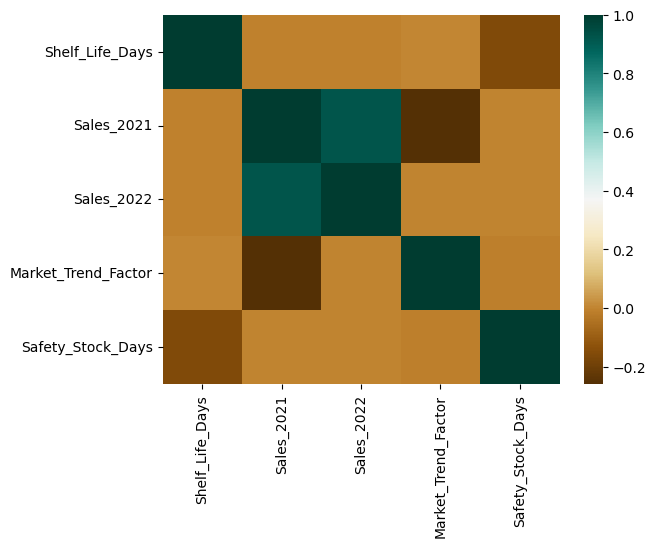

In [16]:
sns.heatmap(Numerical.corr(),cmap = "BrBG")

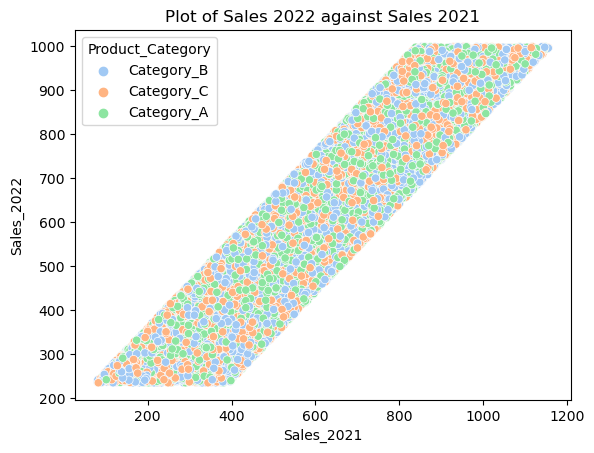

In [28]:
sns.scatterplot(data = df, x = "Sales_2021", y = "Sales_2022",
                hue = "Product_Category",palette = "pastel")
plt.title("Plot of Sales 2022 against Sales 2021")
plt.xlabel("Sales_2021")
plt.ylabel("Sales_2022")
plt.show()


#### 3 Data Forecasting and Optimisation Inventory

#####  3.1 Projected Sales for 2023; Using Market Trend Factor
##### 3.1.1 Feature Engineering 

In [29]:
df_mtf = df.copy()
df_mtf["Projected_Sales_2023"] = df_mtf["Sales_2022"] * df_mtf["Market_Trend_Factor"]
df_mtf["Projected_Sales_2023"]  = df_mtf["Projected_Sales_2023"] .apply(lambda x: x if x >= 0 else 0)
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C,493.935278
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C,335.512507
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B,938.857721
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B,684.538694
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A,452.625369


In [30]:
df.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


##### 3.1.2 label encoding

In [31]:
columns = ["Compliance_Status", "Supplier_ID", "Manufacturing_Location", "Product_Category","Storage_Location"]
label_encoder = {}
for col in columns:
    le = LabelEncoder()
    df_mtf[col] = le.fit_transform(df_mtf[col])
    label_encoder[col] = le

In [32]:
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,493.935278
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,335.512507
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,938.857721
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,684.538694
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,452.625369


##### 3.1.3 Model Building

In [33]:
X = df_mtf.drop(columns = ["Product_ID", "Projected_Sales_2023"])
y = df_mtf["Projected_Sales_2023"]
X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)
mape= mean_absolute_percentage_error(y_test,y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 6.136477660641933
Root Mean Squared Error: 69.92642020915251
Mean Absolute Percentage Error: 0.011815810767917849


##### 3.1.4. Inventory Optimisation

In [34]:
#Average Daily Sales
df_mtf["Average_Daily_Sales"] = (df_mtf["Sales_2021"] + df_mtf["Sales_2022"])/(2*365)

#safety stock
df_mtf["Safety_stock"] = df_mtf["Safety_Stock_Days"] * df_mtf["Average_Daily_Sales"]

#Optimal Inventory for 2023
df_mtf["Optimal_Inventory_2023"] = df_mtf["Projected_Sales_2023"] + df_mtf["Safety_stock"]

#including shelf life estimation
df_mtf["Optimal_Inventory_2023"] =df_mtf.apply(lambda row: min(row["Optimal_Inventory_2023"],
                                              row["Shelf_Life_Days"]*row["Average_Daily_Sales"]),axis = 1)

#### 3.2 Projected Sales for 2023; Linear Projection from Sales.


Genrally the formula is; $y = y_{0} + slope*(x-x_{0}) $

where slope = $ y_{2}- y_{1}/x_{2} - x_{1} $

x = Year

y = Sales

Therefore: 

$Projected\_Sales\_2023 = Sales\_2021 + Slope*(2023-2021)$ = $Sales\_2021 + Slope*2$

$Slope = Sales\_2022- Sales\_2021 / (2022-2021)$ = $Sales\_2022- Sales\_2021$

##### 3.2.1 Feature  Engineeering 

In [35]:
df_lp = df.copy()
slope = df_lp["Sales_2022"] - df_lp["Sales_2021"]
df_lp["Projected_Sales_2023"] = df_lp["Sales_2021"] + 2*slope
df_lp["Projected_Sales_2023"]  = df_lp["Projected_Sales_2023"] .apply(lambda x: x if x >= 0 else 0)
df_lp["Projected_Sales_2023"]

0         487.4
1         330.6
2         847.0
3         712.6
4         533.2
          ...  
19376     673.8
19377     442.0
19378    1006.8
19379     381.8
19380     694.0
Name: Projected_Sales_2023, Length: 19381, dtype: float64

##### 3.2.2 Label Encoding

In [36]:
columns = ["Compliance_Status", "Supplier_ID", "Manufacturing_Location", "Product_Category","Storage_Location"]
label_encoder = {}
for col in columns:
    le = LabelEncoder()
    df_lp[col] = le.fit_transform(df_lp[col])
    label_encoder[col] = le

In [37]:
df_lp.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,487.4
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,330.6
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,847.0
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,712.6
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,533.2


##### 3.2.3 Model Building

In [38]:
X = df_lp.drop(columns = ["Product_ID", "Projected_Sales_2023"])
y = df_lp["Projected_Sales_2023"]
X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)
mape= mean_absolute_percentage_error(y_test,y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 7.2413069647463475
Root Mean Squared Error: 94.27642304385213
Mean Absolute Percentage Error: 0.014975375326575684


##### 3.2.4 Inventory Optimisation

In [39]:
#Average Daily Sales
df_lp["Average_Daily_Sales"] = (df_lp["Sales_2021"] + df_lp["Sales_2022"])/(2*365)

#safety stock
df_lp["Safety_stock"] = df_lp["Safety_Stock_Days"] * df_lp["Average_Daily_Sales"]

#Optimal Inventory for 2023
df_lp["Optimal_Inventory_2023"] = df_lp["Projected_Sales_2023"] + df_lp["Safety_stock"]

#including shelf life estimation
df_lp["Optimal_Inventory_2023"] =df_lp.apply(lambda row: min(row["Optimal_Inventory_2023"],
                                              row["Shelf_Life_Days"]*row["Average_Daily_Sales"]),axis = 1)

#### 3.3 Comparing the two methods

In [40]:
columns = ["Projected_Sales_2023", "Optimal_Inventory_2023"]
errors = {}
for col in columns:
    mtf,lp = df_mtf[col], df_lp[col]
    mae = mean_absolute_error(mtf,lp)
    rmse = mean_squared_error(mtf,lp)
    mape = mean_absolute_percentage_error(mtf,lp) * 1000
    errors[col] = [mae,rmse,mape]
pd.DataFrame(errors, index = ["MAE", "RSME", "MAPE"])

,Projected_Sales_2023,Optimal_Inventory_2023
MAE,92.516408,17.137992
RSME,12873.965456,1734.213358
MAPE,166.614231,47.194512


#### 4. Communication

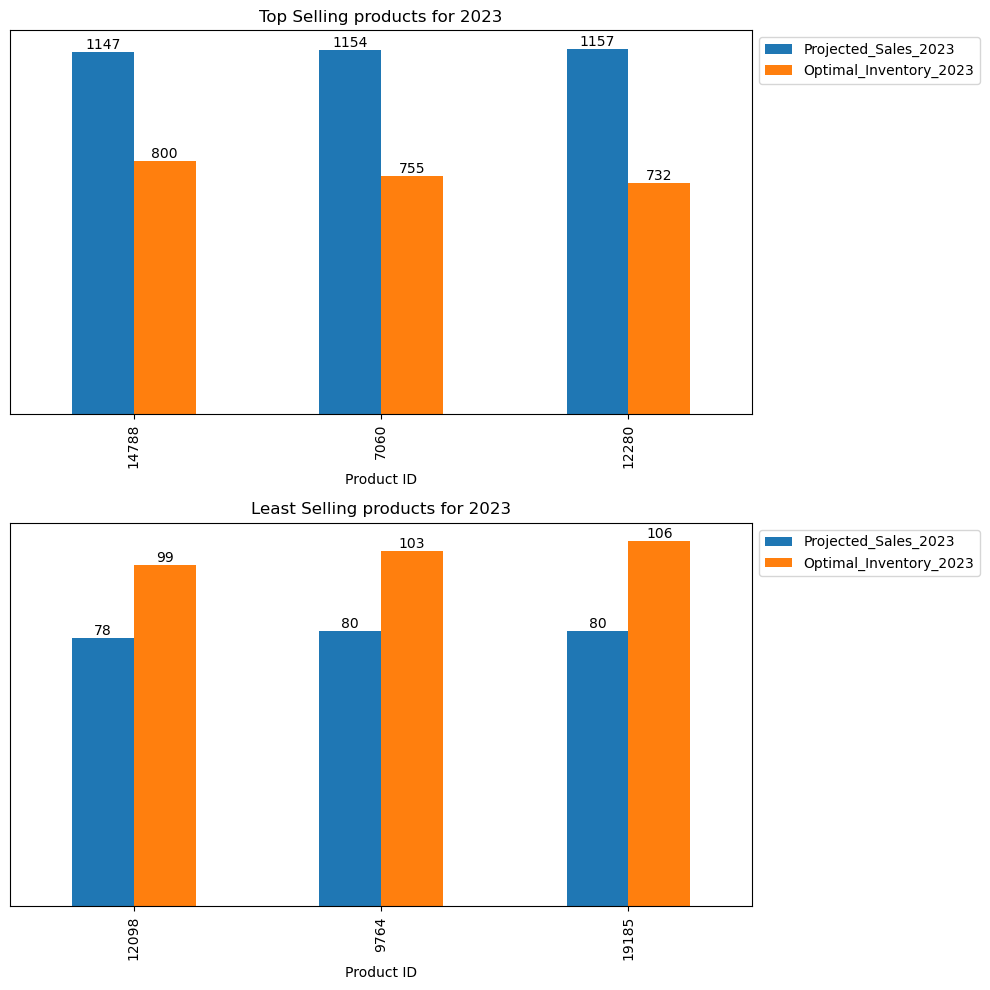

<Figure size 640x480 with 0 Axes>

In [41]:
top_pdt = df_lp[["Projected_Sales_2023", "Optimal_Inventory_2023"]
             ].sort_values(by = "Projected_Sales_2023").tail(3)
top_pdt = top_pdt.round()
least_pdt = df_lp[["Projected_Sales_2023", "Optimal_Inventory_2023"]
             ].sort_values(by = "Projected_Sales_2023").head(3)
least_pdt = least_pdt.round()
fig, ax = plt.subplots(2,1, figsize = (10,10))
top_pdt.plot(kind = "bar", ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
ax[0].set_yticks([])
ax[0].set_title("Top Selling products for 2023")
ax[0].set_xlabel("Product ID")


least_pdt.plot(kind = "bar", ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='edge')
ax[1].legend(loc = "upper left",bbox_to_anchor = (1,1))
ax[1].set_yticks([])
ax[1].set_title("Least Selling products for 2023")
ax[1].set_xlabel("Product ID")

plt.tight_layout()
plt.show()

plt.savefig("Products")



#### Conclusion

Products with ID **14788, 7060, 12280** are projected to have the highest sales in 2023. For products with Optimal inventory lesser than the total sales as them, **caution** should be taken in getting these products in batches to avoid degradation.



Products with ID **12098, 9764,19185** are projected to have the least number sales in 2023. For products with Optimal inventory
greater than the total sales as them, **caution** should be taken in not exceeding the optimal inventory for that year
